<a href="https://colab.research.google.com/github/ahmedshaik982/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data 
data = pd.read_csv('/content/drive/My Drive/files/SeoulBikeData.csv',encoding='latin1')
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [4]:
# Getiing the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# checking for duplicated values
data.duplicated().sum()

0

Hence, the data has no duplicated values

In [6]:
# Checking for null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hence, the data has no null values. So we can deep dive into exploratory data analysis.

# **Exploratory Data Analysis**

In EDA, we explore the following things:


*   All the numerical features

*   All the categorical features

*   Distribution of numerical features

*   Cardinality of categorical features
*   Outliers


*   Relationship between independent features and dependent feature (Rented Bike Count)




In [7]:
# Storing list of columns
col = data.columns
col

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# Converting Date column which is in string datatype to datetime datatype
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [9]:
data['Hour'] = data['Hour'].astype(str)

In [10]:
# Date feature
date_feat = [feature for feature in col if data[feature].dtype == 'datetime64[ns]']
date_feat

['Date']

In [11]:
# Getting the numerical features
num_feat = [feature for feature in col if data[feature].dtype != 'object' and data[feature].dtype != 'datetime64[ns]']
num_feat

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [12]:
# Getting the categorical features
cat_feat = [feature for feature in col if data[feature].dtype == 'O' ]
cat_feat

['Hour', 'Seasons', 'Holiday', 'Functioning Day']

In [13]:
# Visualizing box plot of dependent feature (Rented Bike Count)
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Rented Bike Count', data = data)
plt.show()

From the above box plot we can observe that count mostly ranges from 200 to 1100. And outliers are also present which are above 2400.

In [14]:
# Distribution of numerical features
# Creating a function which takes column name as attribute and returns the distribution plot
def dist_num_feat(feature):
  plt.figure(figsize = (8,6))
  sns.distplot(data[feature])
  plt.title(f'Distribution plot of {feature}')
  plt.show()

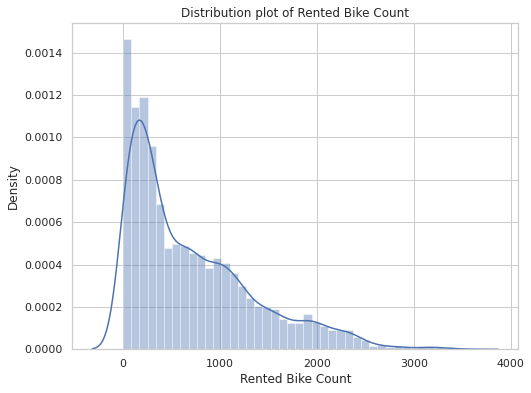

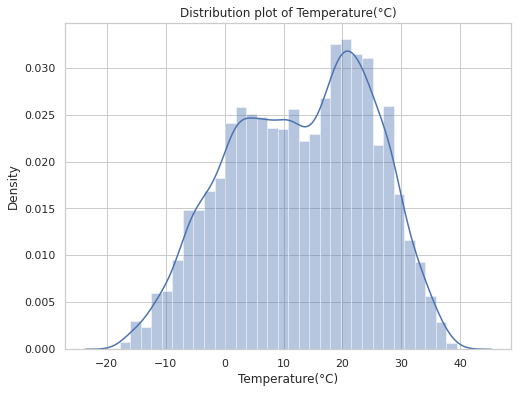

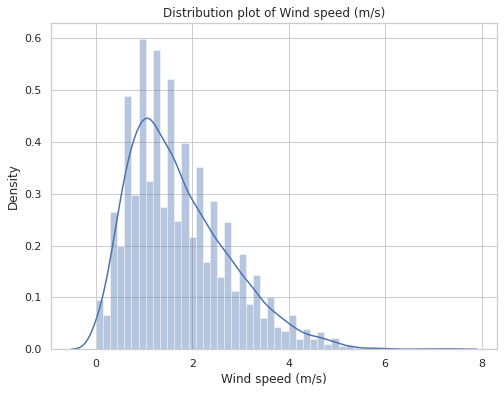

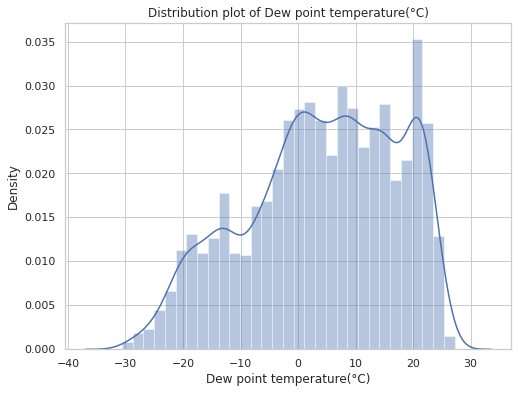

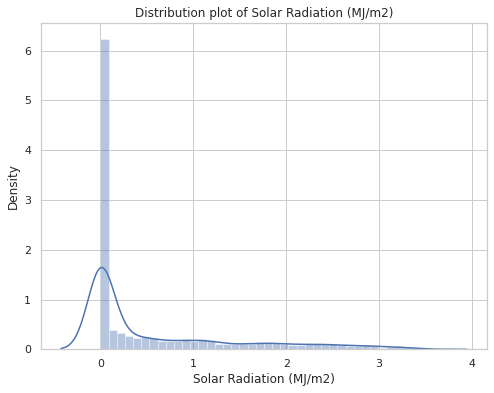

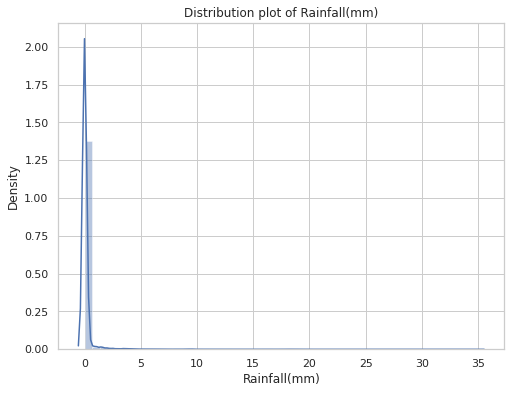

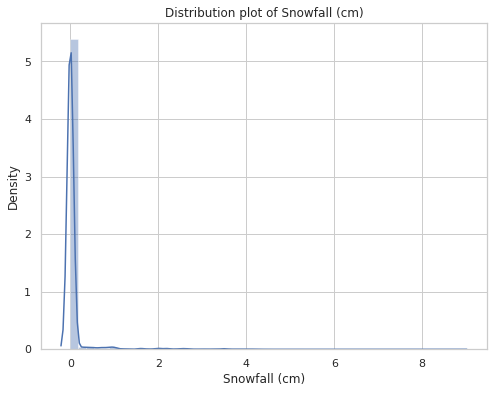

In [15]:
# Creating distribution plots for all numerical features
for feature in num_feat:
  dist_num_feat(feature)



*   Most number of the bike count ranges from 0 to 500.

*   Temperature mostly varies from 20 to 30
*   Humidity mostly varies from 20 to 100


*   Wind speed mostly varies from 2 to 4 m/s

*  Visibility of 2000 count is high.
*   Solar Radiation is mostly 0. And a few are in range of 1 to 4
*   Mostly there is no rainfall and snowfall. And a very few have rainfall and snowfall.






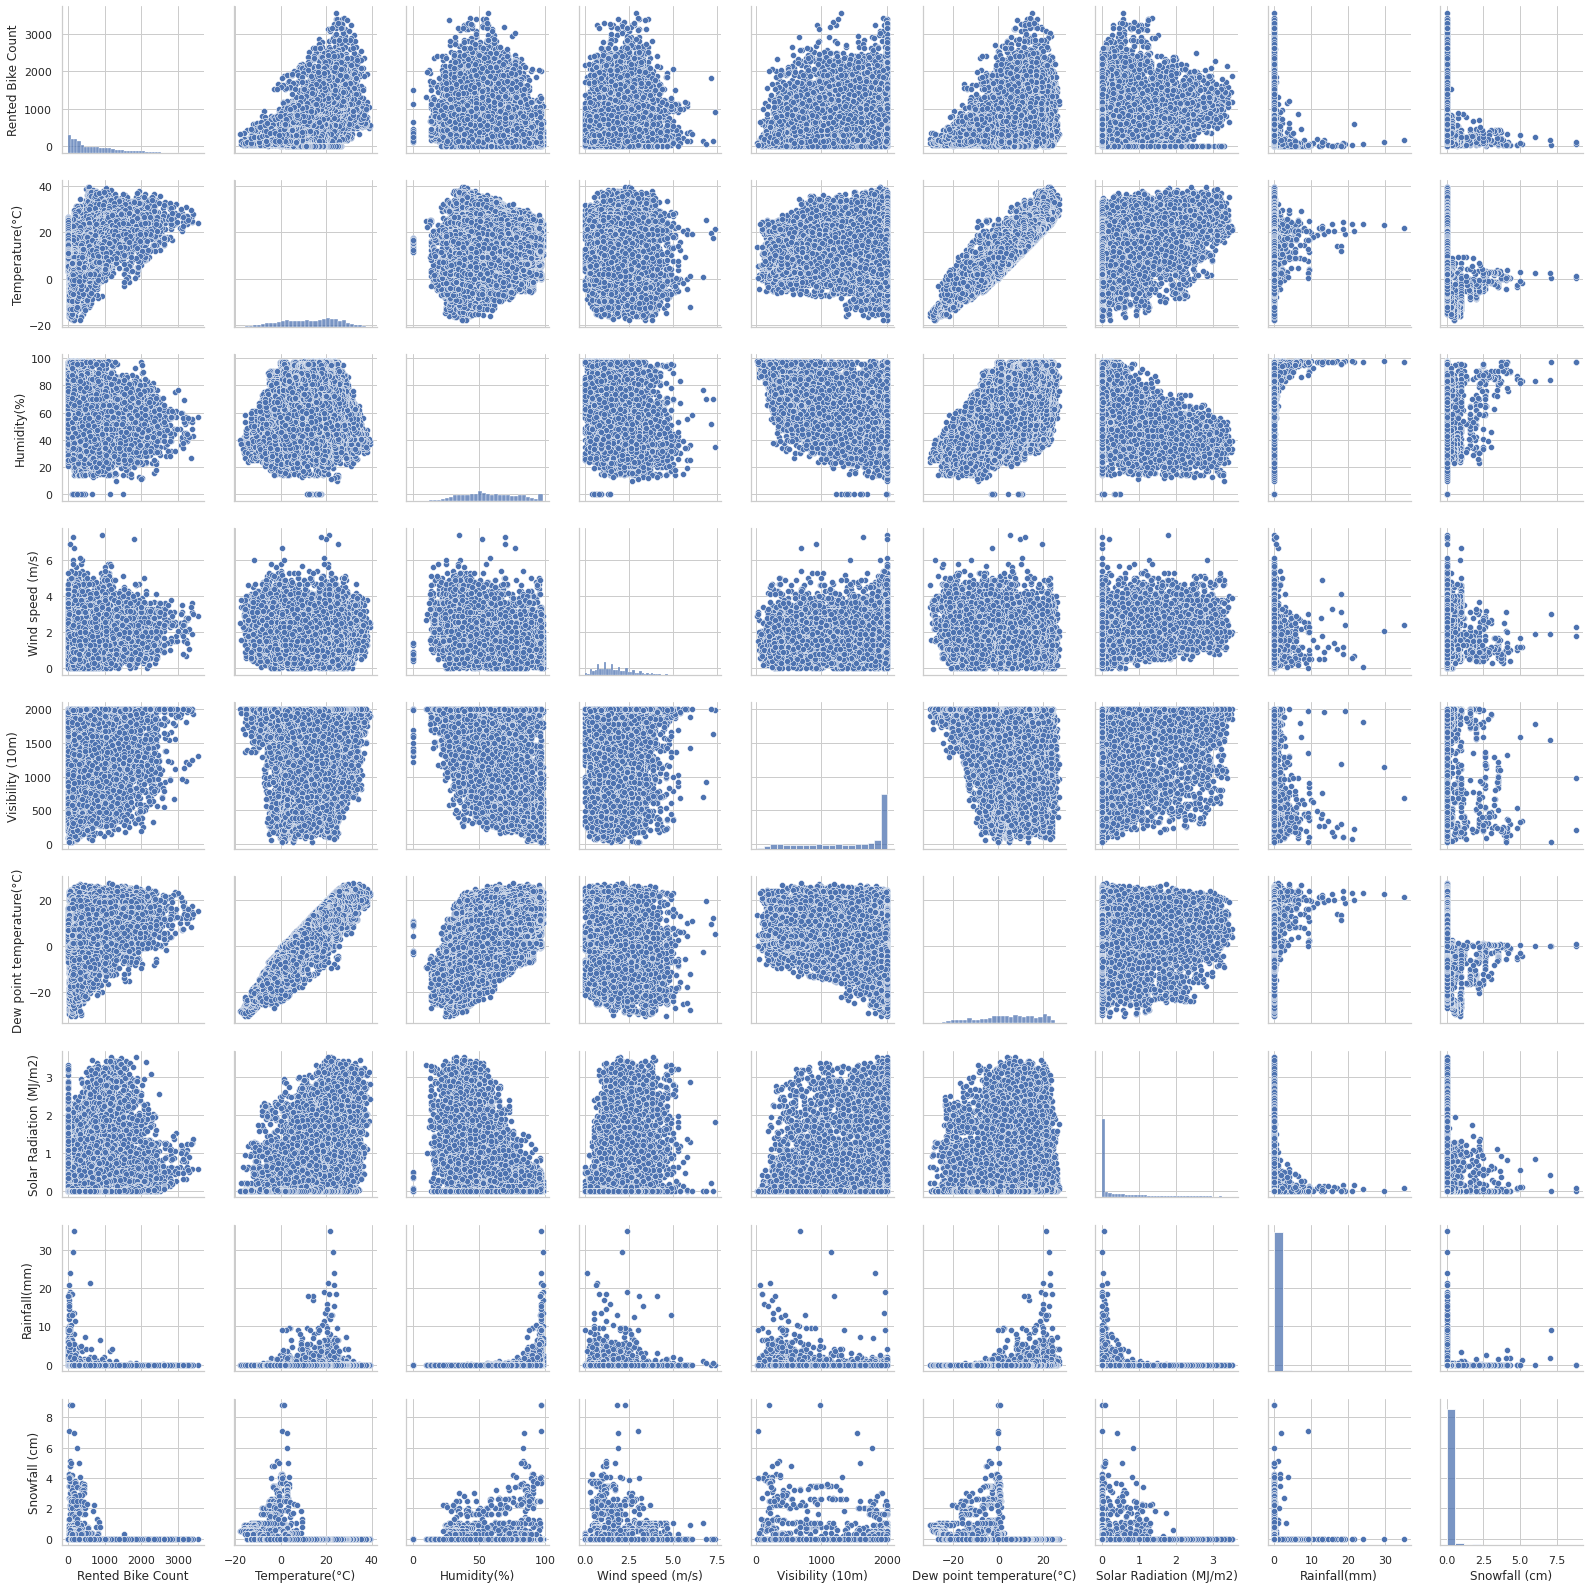

In [16]:
# Plotting pair plot
sns.pairplot(data)

In [17]:
# observing realtionship between independent and dependent feature
def scatter_plot(feature):
  plt.scatter(data[feature], data['Rented Bike Count'])
  plt.title(f'{feature} vs Rented Bike Count')
  plt.show()


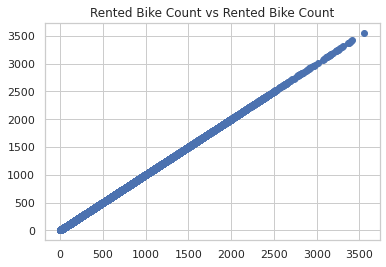

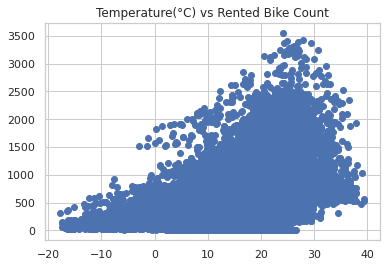

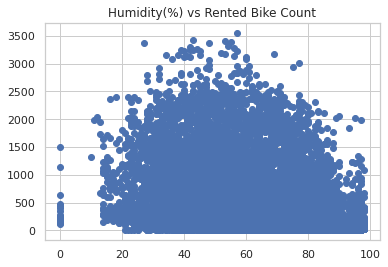

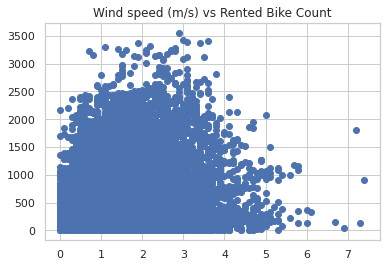

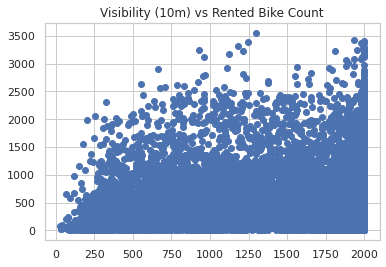

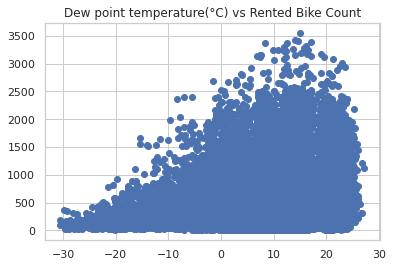

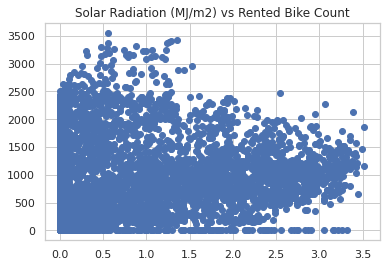

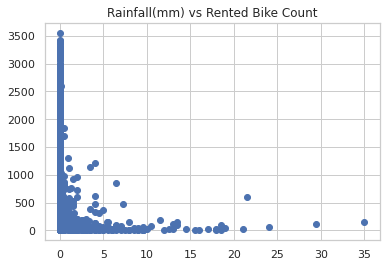

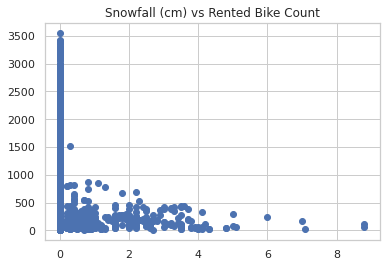

In [18]:
# Plotting scatter plots between dependent feature and numerical features
for feature in num_feat:
  scatter_plot(feature)
  print('\t'*2 )

From the above all scatter plots, the distribution between numerical features and dependent feature (Rented Bike Count) has been spread out entire area which means there is no specific relation between them.

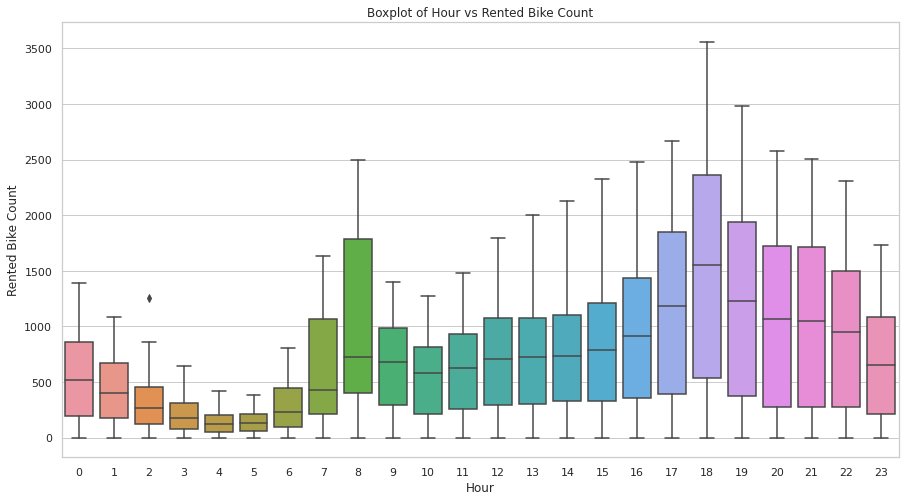

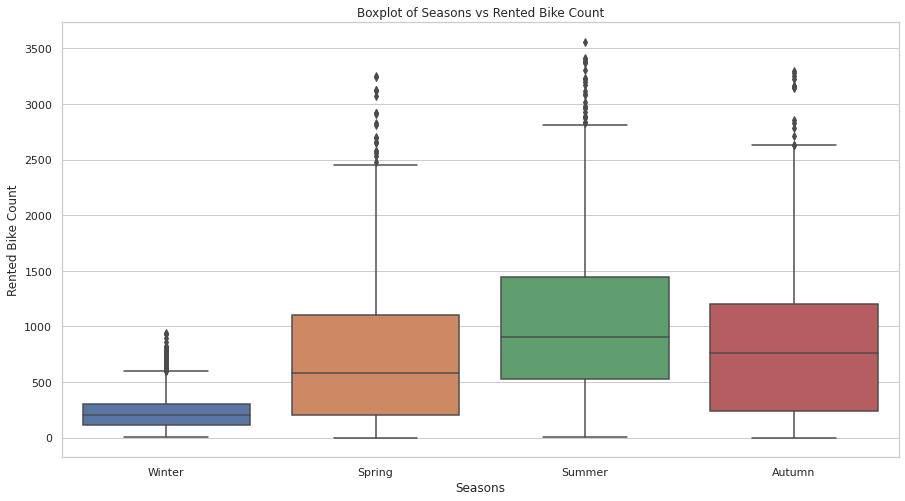

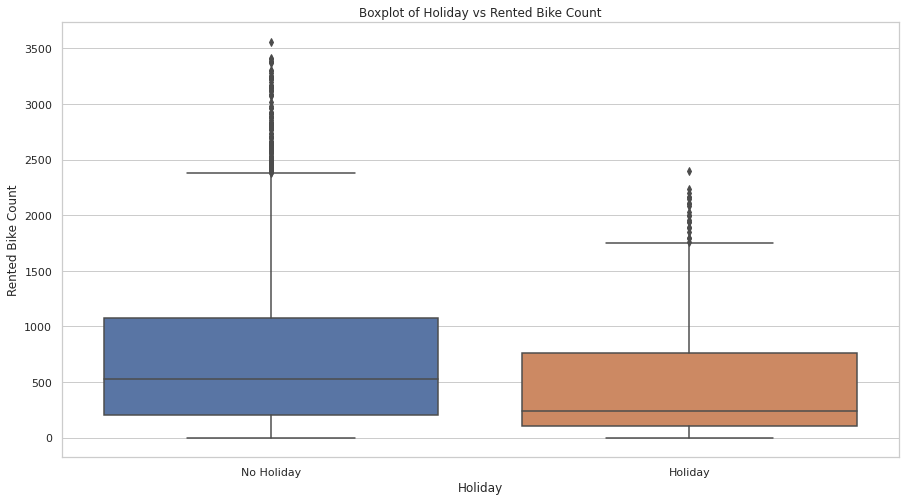

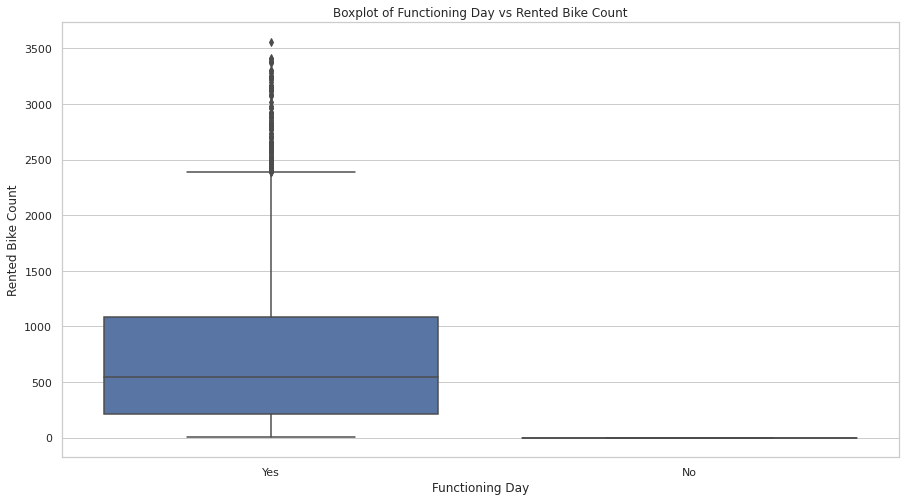

In [19]:
# Relationship between categorical features and Dependent feature (Rented Bike Count)
for feature in cat_feat:
  plt.figure(figsize = (15, 8))
  sns.boxplot(x = feature, y = 'Rented Bike Count', data = data)
  plt.title(f'Boxplot of {feature} vs Rented Bike Count')
  plt.show()
  print('\t ')

From the above box plots, we can see there are various outliers present in categorical features.

In [20]:
# Creating a dataframe of hours and their rented bike counts
hour_df = data.groupby('Hour')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)
hour_df

Hour  Rented Bike Count
10   18             548568
11   19             436229
9    17             415556
13   20             390172
14   21             376479
22    8             370731
8    16             339677
15   22             336821
7    15             302653
6    14             276971
5    13             267635
4    12             255296
16   23             244961
23    9             235784
21    7             221192
3    11             219311
0     0             197633
2    10             192655
1     1             155557
12    2             110095
20    6             104961
17    3              74216
19    5              50765
18    4              48396

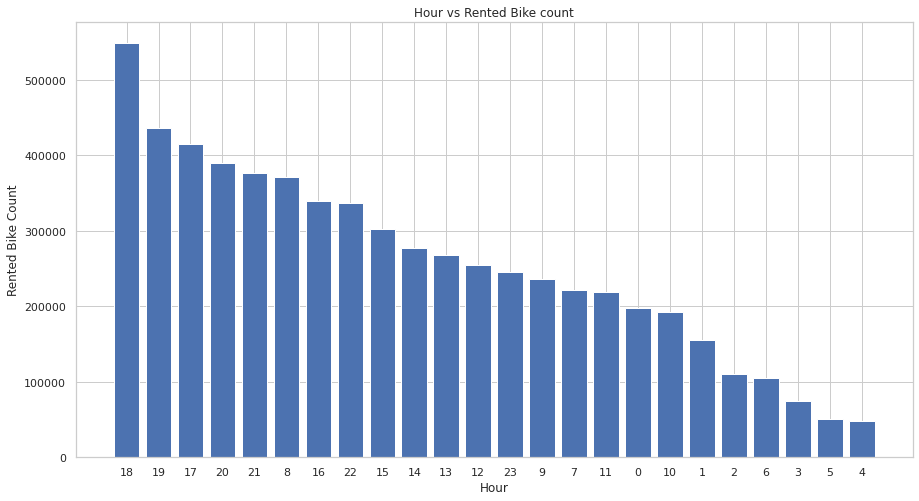

In [21]:
# Plotting the above dataframe 
plt.figure(figsize = (15, 8))
plt.bar(hour_df['Hour'], hour_df['Rented Bike Count'])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour vs Rented Bike count')
plt.show()

From the above dataframe and visualizations, we can say that more number of bikes are rented in the hour of 18 followed by 19th hour. And the least is 4th hour

In [22]:
# Variation of Seasons with Rented bike counts
season_df = data.groupby('Seasons')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
season_df

Seasons  Rented Bike Count
2  Summer        1034.073370
0  Autumn         819.597985
1  Spring         730.031250
3  Winter         225.541204

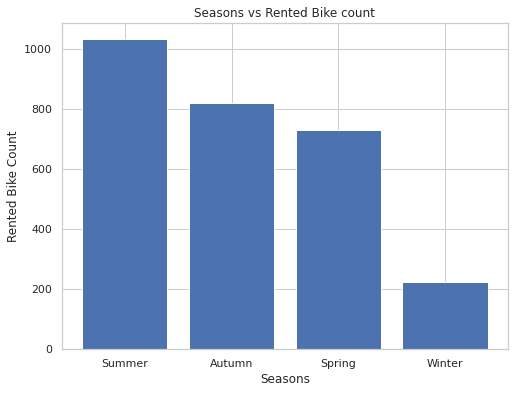

In [23]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(season_df['Seasons'], season_df['Rented Bike Count'])
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Seasons vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in summer season, most number of bikes are rented and the least is winter season.

In [24]:
# Variation of holiday with Rented bike counts
holiday_df = data.groupby('Holiday')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
holiday_df

Holiday  Rented Bike Count
1  No Holiday         715.228026
0     Holiday         499.756944

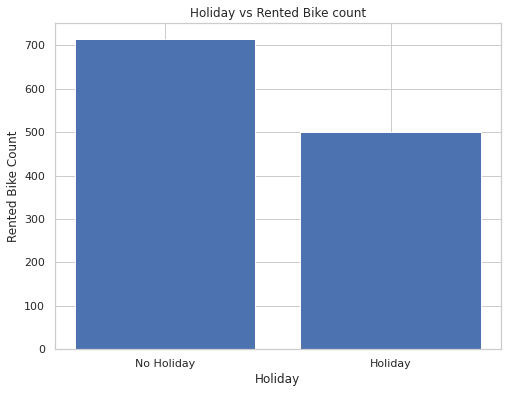

In [25]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(holiday_df['Holiday'], holiday_df['Rented Bike Count'])
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Holiday vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in working days(No Holiday), most number of bikes are rented.

In [26]:
# Variation of Functioning Day with Rented bike counts
func_df = data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
func_df

Functioning Day  Rented Bike Count
1             Yes         729.156999
0              No           0.000000

From the above dataframe, In a functioning day, most number of bikes are rented.

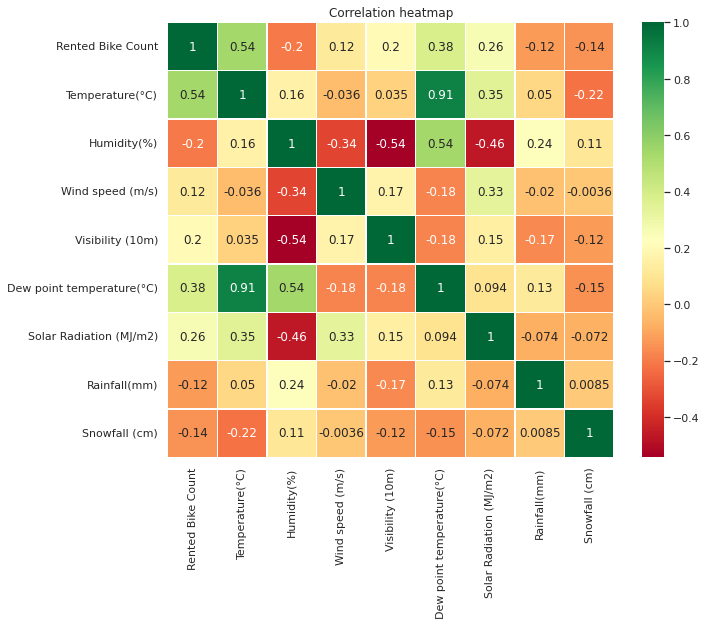

In [27]:
# Visualize the correl,ation heatmap of numerical features
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

From the above correlation heatmap, we can observe that multicollinearity exits between two features namely Temperature and Dew Point Temperature. And


*   Humidity, Rainfall, Snowfall are negatively correlated with dependent variable. That means, if the above feature values increases, dependent feature value will decreases and viceversa.




# **Data Preprocessing:**


In this step, we will do the following:


*   Applying log to 'Rented Bike Count' column as it is positively skewed

*   Removing Outliers

*   One hot encoding to categorical features

*   MinMax Scaling the features
*   Spliting the data into train and test datasets





In [28]:
def log_dep(x):
  if x == 0:
    return 1
  else:
    return x

In [29]:
data['Rented Bike Count'] = data['Rented Bike Count'].apply(log_dep)

In [30]:
data.head()

Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254    0             -5.2           37   
1 2017-01-12                204    1             -5.5           38   
2 2017-01-12                173    2             -6.0           39   
3 2017-01-12                107    3             -6.2           40   
4 2017-01-12                 78    4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [31]:
# Apply log to dependent feature 
data['Rented Bike Count'] = np.log(data['Rented Bike Count'])

In [32]:
dep_var = 'Rented Bike Count'
indep_var = list(set(col.tolist()) - {dep_var, 'Date'})
indep_var

['Seasons',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Hour',
 'Dew point temperature(°C)',
 'Holiday',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Functioning Day',
 'Humidity(%)']

In [33]:
data.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count        8760.000000      8760.000000  8760.000000       8760.000000   
mean            5.882209        12.882922    58.226256          1.724909   
std             1.585281        11.944825    20.362413          1.036300   
min             0.000000       -17.800000     0.000000          0.000000   
25%             5.252273         3.500000    42.000000          0.900000   
50%             6.223567        13.700000    57.000000          1.500000   
75%             6.970965        22.500000    74.000000          2.300000   
max             8.176392        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean        1436.825799                   4.073813                 0.569111   
std          608.298712                  13.060369                 0.868746   
min           27.000000                 -30.600000                 0.000000   
25%          940.000000                  -4.700000                 0.000000   
50%         1698.000000                   5.100000                 0.010000   
75%         2000.000000                  14.800000                 0.930000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)  
count   8760.000000    8760.000000  
mean       0.148687       0.075068  
std        1.128193       0.436746  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       35.000000       8.800000

In the data every feature has some outliers. So we have to remove all of them.

In [34]:
# Removing Outliers
# Creating a for loop for storing the indeces of outliers
for i in num_feat:
  indeces = []                                              # creating a empty list
  x = data[i]
  mean = data[i].mean()
  std = data[i].std()
  index = data[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)                                     # appending outlier indeces into indeces list


In [35]:
# Displaying the list of indeces of outliers
list(indeces)[0]

Int64Index([ 222,  223,  224,  225,  226,  227,  228,  229,  230,  415,
            ...
            8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629],
           dtype='int64', length=173)

In [55]:
# CReating a copy of data
new_data = data.copy()

In [56]:
# Dropping the outliers
new_data.drop(list(indeces)[0] , inplace = True)

In [57]:
new_data

Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12           5.537334    0             -5.2           37   
1    2017-01-12           5.318120    1             -5.5           38   
2    2017-01-12           5.153292    2             -6.0           39   
3    2017-01-12           4.672829    3             -6.2           40   
4    2017-01-12           4.356709    4             -6.0           36   
...         ...                ...  ...              ...          ...   
8755 2018-11-30           6.910751   19              4.2           34   
8756 2018-11-30           6.638568   20              3.4           37   
8757 2018-11-30           6.542472   21              2.6           39   
8758 2018-11-30           6.568078   22              2.1           41   
8759 2018-11-30           6.369901   23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8587 rows x 14 columns]

In [58]:
new_data['Functioning Day'].value_counts().sort_values()

No      295
Yes    8292
Name: Functioning Day, dtype: int64

In [59]:
df = pd.get_dummies(data = new_data, columns = ['Hour', 'Seasons', 'Holiday', 'Functioning Day'])

In [60]:
df

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0    2017-01-12           5.537334             -5.2           37   
1    2017-01-12           5.318120             -5.5           38   
2    2017-01-12           5.153292             -6.0           39   
3    2017-01-12           4.672829             -6.2           40   
4    2017-01-12           4.356709             -6.0           36   
...         ...                ...              ...          ...   
8755 2018-11-30           6.910751              4.2           34   
8756 2018-11-30           6.638568              3.4           37   
8757 2018-11-30           6.542472              2.6           39   
8758 2018-11-30           6.568078              2.1           41   
8759 2018-11-30           6.369901              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ...  Hour_8  \
0                         0.0           0.0            0.0  ...       0   
1                         0.0           0.0            0.0  ...       0   
2                         0.0           0.0            0.0  ...       0   
3                         0.0           0.0            0.0  ...       0   
4                         0.0           0.0            0.0  ...       0   
...                       ...           ...            ...  ...     ...   
8755                      0.0           0.0            0.0  ...       0   
8756                      0.0           0.0            0.0  ...       0   
8757                      0.0           0.0            0.0  ...       0   
8758                      0.0           0.0            0.0  ...       0   
8759                      0.0           0.0            0.0  ...       0   

      Hour_9  Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0          0               0               0               0               1   
1          0               0               0               0               1   
2          0               0               0               0               1   
3          0               0               0               0               1   
4          0               0               0               0               1   
...      ...             ...             ...             ...             ...   
8755       0               1               0               0               0   
8756       0               1               0               0               0   
8757       0               1               0               0               0   
8758       0               1               0               0               0   
8759       0               1               0               0               0   

      Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   
...               ...                 ...                 ...   
8755                0   

In [61]:
df.columns

Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_0',
       'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_2',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')

In [62]:
df.drop(['Date', 'Dew point temperature(°C)'], axis = 1, inplace = True)

In [63]:

dep_var = 'Rented Bike Count'
indep_var = list(set(df.columns.tolist()) - {dep_var})
indep_var

['Hour_23',
 'Snowfall (cm)',
 'Hour_8',
 'Hour_16',
 'Hour_0',
 'Hour_14',
 'Hour_5',
 'Functioning Day_Yes',
 'Hour_10',
 'Holiday_No Holiday',
 'Hour_4',
 'Hour_11',
 'Hour_13',
 'Hour_3',
 'Hour_2',
 'Seasons_Spring',
 'Hour_17',
 'Hour_12',
 'Wind speed (m/s)',
 'Hour_6',
 'Hour_7',
 'Holiday_Holiday',
 'Seasons_Summer',
 'Temperature(°C)',
 'Hour_22',
 'Seasons_Winter',
 'Visibility (10m)',
 'Humidity(%)',
 'Hour_20',
 'Hour_15',
 'Functioning Day_No',
 'Hour_21',
 'Hour_9',
 'Rainfall(mm)',
 'Seasons_Autumn',
 'Hour_18',
 'Solar Radiation (MJ/m2)',
 'Hour_1',
 'Hour_19']

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [65]:
X = df[indep_var]
y = df[dep_var]

In [66]:
df.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count        8587.000000      8587.000000  8587.000000       8587.000000   
mean            5.900991        13.172703    57.967975          1.730861   
std             1.591658        11.876801    20.284731          1.040778   
min             0.000000       -17.800000     0.000000          0.000000   
25%             5.285735         4.000000    42.000000          0.900000   
50%             6.265301        14.200000    57.000000          1.500000   
75%             6.980076        22.700000    74.000000          2.300000   
max             8.176392        39.400000    98.000000          7.400000   

       Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
count       8587.000000              8587.000000   8587.000000    8587.000000   
mean        1445.190986                 0.576311      0.148830       0.020636   
std          603.503620                 0.874421      1.133708       0.125728   
min           27.000000                 0.000000      0.000000       0.000000   
25%          956.500000                 0.000000      0.000000       0.000000   
50%         1706.000000                 0.010000      0.000000       0.000000   
75%         2000.000000                 0.950000      0.000000       0.000000   
max         2000.000000                 3.520000     35.000000       1.300000   

            Hour_0       Hour_1  ...       Hour_8       Hour_9  \
count  8587.000000  8587.000000  ...  8587.000000  8587.000000   
mean      0.041807     0.041691  ...     0.041342     0.041342   
std       0.200160     0.199894  ...     0.199091     0.199091   
min       0.000000     0.000000  ...     0.000000     0.000000   
25%       0.000000     0.000000  ...     0.000000     0.000000   
50%       0.000000     0.000000  ...     0.000000     0.000000   
75%       0.000000     0.000000  ...     0.000000     0.000000   
max       1.000000     1.000000  ...     1.000000     1.000000   

       Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
count     8587.000000     8587.000000     8587.000000     8587.000000   
mean         0.250844        0.257133        0.257133        0.234890   
std          0.433524        0.437079        0.437079        0.423955   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          1.000000        1.000000        1.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
count      8587.000000         8587.000000         8587.000000   
mean          0.050309            0.949691            0.034354   
std           0.218594            0.218594            0.182148   
min           0.000000            0.000000            0.000000   
25%           0.000000            1.000000            0.000000   
50%           0.000000            1.000000            0.000000   
75%           0.000000            1.000000            0.000000   
max           1.000000            1.000000            1.000000   

       Functioning Day_Yes  
count          8587.000000  
mean              0.965646  
std               0.182148  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000  

[8 rows x 40 columns]

In [67]:
scaler = MinMaxScaler()
df[indep_var] = scaler.fit_transform(df[indep_var])

In [68]:
df

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              5.537334         0.220280     0.377551          0.297297   
1              5.318120         0.215035     0.387755          0.108108   
2              5.153292         0.206294     0.397959          0.135135   
3              4.672829         0.202797     0.408163          0.121622   
4              4.356709         0.206294     0.367347          0.310811   
...                 ...              ...          ...               ...   
8755           6.910751         0.384615     0.346939          0.351351   
8756           6.638568         0.370629     0.377551          0.310811   
8757           6.542472         0.356643     0.397959          0.040541   
8758           6.568078         0.347902     0.418367          0.135135   
8759           6.369901         0.344406     0.438776          0.175676   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0             1.000000                      0.0           0.0            0.0   
1             1.000000                      0.0           0.0            0.0   
2             1.000000                      0.0           0.0            0.0   
3             1.000000                      0.0           0.0            0.0   
4             1.000000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755          0.946275                      0.0           0.0            0.0   
8756          1.000000                      0.0           0.0            0.0   
8757          0.983781                      0.0           0.0            0.0   
8758          0.928535                      0.0           0.0            0.0   
8759          0.953877                      0.0           0.0            0.0   

      Hour_0  Hour_1  ...  Hour_8  Hour_9  Seasons_Autumn  Seasons_Spring  \
0        1.0     0.0  ...     0.0     0.0             0.0             0.0   
1        0.0     1.0  ...     0.0     0.0             0.0             0.0   
2        0.0     0.0  ...     0.0     0.0             0.0             0.0   
3        0.0     0.0  ...     0.0     0.0             0.0             0.0   
4        0.0     0.0  ...     0.0     0.0             0.0             0.0   
...      ...     ...  ...     ...     ...             ...             ...   
8755     0.0     0.0  ...     0.0     0.0             1.0             0.0   
8756     0.0     0.0  ...     0.0     0.0             1.0             0.0   
8757     0.0     0.0  ...     0.0     0.0             1.0             0.0   
8758     0.0     0.0  ...     0.0     0.0             1.0             0.0   
8759     0.0     0.0  ...     0.0     0.0             1.0             0.0   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0                0.0             1.0              0.0                 1.0   
1                0.0             1.0              0.0                 1.0   
2                0.0             1.0              0.0                 1.0   
3                0.0             1.0              0.0                 1.0   
4                0.0             1.0              0.0                 1.0   
...              ...             ...              ...                 ...   
8755             0.0             0.0              0.0                 1.0   
8756             0.0             0.0              0.0                 1.0   
8757             0.0             0.0              0.0                 1.0   
8758             0.0             0.0              0.0                 1.0   
8759             0.0             0.0              0.0                 1.0   

      Functioning Day_No  Functioning Day_Yes  
0                    0.0                  1.0  
1                    0.0                  1.0  
2                    0.0                  1.0  
3                    0.0                  1.0  
4                    0.0                  1.0  
...   

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
import statsmodels.api as sm

# create feature matrix and target variable

X = sm.add_constant(X_train) # add constant value for the intercept term


# define and fit model
lineare_regression_model = sm.OLS(y_train, X)
result = lineare_regression_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1046.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:37:58   Log-Likelihood:                -6678.1
No. Observations:                6869   AIC:                         1.343e+04
Df Residuals:                    6833   BIC:                         1.367e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [74]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00487871, 0.02293066, 0.02015264, 0.00600222, 0.0098233 ,
       0.01276815, 0.04396039, 0.16042019, 0.01705497, 0.00595969,
       0.0392404 , 0.01411859, 0.00643447, 0.02796366, 0.02135479,
       0.00629368, 0.0105677 , 0.00946707, 0.01107814, 0.02134008,
       0.00529227, 0.00669097, 0.0639308 , 0.36297569, 0.00561485,
       0.19166856, 0.06745259, 0.10559332, 0.01411106, 0.00468698,
       0.15492419, 0.01689931, 0.01014803, 0.06758103, 0.06149195,
       0.03332951, 0.19296109, 0.00813834, 0.01147482])

In [85]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
info_df = mutual_info.sort_values(ascending = False).reset_index().rename(columns = {'index':'feature', 0:'info'})
info_df

feature      info
0           Temperature(°C)  0.362976
1   Solar Radiation (MJ/m2)  0.192961
2            Seasons_Winter  0.191669
3       Functioning Day_Yes  0.160420
4        Functioning Day_No  0.154924
5               Humidity(%)  0.105593
6              Rainfall(mm)  0.067581
7          Visibility (10m)  0.067453
8            Seasons_Summer  0.063931
9            Seasons_Autumn  0.061492
10                   Hour_5  0.043960
11                   Hour_4  0.039240
12                  Hour_18  0.033330
13                   Hour_3  0.027964
14            Snowfall (cm)  0.022931
15                   Hour_2  0.021355
16                   Hour_6  0.021340
17                   Hour_8  0.020153
18                  Hour_10  0.017055
19                  Hour_21  0.016899
20                  Hour_11  0.014119
21                  Hour_20  0.014111
22                  Hour_14  0.012768
23                  Hour_19  0.011475
24         Wind speed (m/s)  0.011078
25                  Hour_17  0.010568
26                   Hour_9  0.010148
27                   Hour_0  0.009823
28                  Hour_12  0.009467
29                   Hour_1  0.008138
30          Holiday_Holiday  0.006691
31                  Hour_13  0.006434
32           Seasons_Spring  0.006294
33                  Hour_16  0.006002
34       Holiday_No Holiday  0.005960
35                  Hour_22  0.005615
36                   Hour_7  0.005292
37                  Hour_23  0.004879
38                  Hour_15  0.004687

In [100]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
feature_selection = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [104]:
sel = X_train.columns[feature_selection.get_support()]
sel

Index(['Hour_23', 'Hour_8', 'Hour_14', 'Hour_5', 'Functioning Day_Yes',
       'Hour_10', 'Holiday_No Holiday', 'Hour_4', 'Hour_3', 'Hour_2',
       'Hour_17', 'Hour_6', 'Hour_7', 'Holiday_Holiday', 'Temperature(°C)',
       'Hour_22', 'Seasons_Winter', 'Visibility (10m)', 'Humidity(%)',
       'Hour_20', 'Functioning Day_No', 'Hour_21', 'Hour_9', 'Rainfall(mm)',
       'Seasons_Autumn', 'Hour_18', 'Solar Radiation (MJ/m2)', 'Hour_1',
       'Hour_19'],
      dtype='object')

In [105]:
def summ(df):
  
  X = df[list(sel)]
  y = df['Rented Bike Count']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  X = sm.add_constant(X_train) # add constant value for the intercept term


  # define and fit model
  lineare_regression_model = sm.OLS(y_train, X)
  result = lineare_regression_model.fit()
  print(result.summary())


In [106]:
summ(df)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1253.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:18:29   Log-Likelihood:                -6745.0
No. Observations:                6869   AIC:                         1.355e+04
Df Residuals:                    6841   BIC:                         1.374e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

In [110]:
# Taking only selected features based on above result
X_train = X_train[sel]
X_test = X_test[sel]

# **Fitting into Model**

**Linear regression**

In [170]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train) 


In [171]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Creating a function which results evaluation metrics of the model.
def metrics(model):
  # metrics for training dataset
  r2 = r2_score(y_train, model.predict(X_train))
  mse = mean_squared_error(y_train, model.predict(X_train))
  rmse = np.sqrt(mse)
  
  n = len(X_train)
  k = len(X_train.columns)
  adj_r2 = 1 - ( ((n-1)/(n-k-1)) * (1 - r2) )

  mean_abs_err = sum(abs(y_train - model.predict(X_train))) /len(y_train)


  
  print('The evaluation metrics for training dataset.....')
  print(f'Score : {model.score(X_train, y_train)}')
  print(f'R2_Score : {r2}')
  print(f'Mean Square Error : {mse}')
  print(f'Root Mean Square Error : {rmse}')
  print(f'Adjusted R2 Score : {adj_r2}')
  print(f'Mean Absolute Error : {mean_abs_err}')
  print('\t')
  print('\t')

  # metrics for test dataset
  r2 = r2_score(y_test, model.predict(X_test))
  mse = mean_squared_error(y_test, model.predict(X_test))
  rmse = np.sqrt(mse)
  
  n = len(X_test)
  k = len(X_test.columns)
  adj_r2 = 1 - ( ((n-1)/(n-k-1)) * (1 - r2) )

  mean_abs_err = sum(abs(y_test - model.predict(X_test))) /len(y_test)


  
  print('The evaluation metrics for test dataset.....')
  print(f'Score : {model.score(X_test, y_test)}')
  print(f'R2_Score : {r2}')
  print(f'Mean Square Error : {mse}')
  print(f'Root Mean Square Error : {rmse}')
  print(f'Adjusted R2 Score : {adj_r2}')
  print(f'Mean Absolute Error : {mean_abs_err}')
  print('\t')



In [172]:
metrics(lin_model)

The evaluation metrics for training dataset.....
Score : 0.8415877896259971
R2_Score : 0.8415877896259971
Mean Square Error : 0.4122290997572223
Root Mean Square Error : 0.6420506987436602
Adjusted R2 Score : 0.8409160607035163
Mean Absolute Error : 0.44414532822305275
	
	
The evaluation metrics for test dataset.....
Score : 0.8207078007510813
R2_Score : 0.8207078007510813
Mean Square Error : 0.40387191984956666
Root Mean Square Error : 0.6355091815619713
Adjusted R2 Score : 0.8176275437734637
Mean Absolute Error : 0.4393212737661912
	


In [173]:
# Creating a function which plots actual and predicted values for the model 
def actual_pred(model):
  plt.figure(figsize = (20,12))
  plt.plot(np.array(y_test), color ='red')
  plt.plot(np.array(model.predict(X_test)), color = 'green')
  plt.legend(["Predicted","Actual"])
  plt.show()

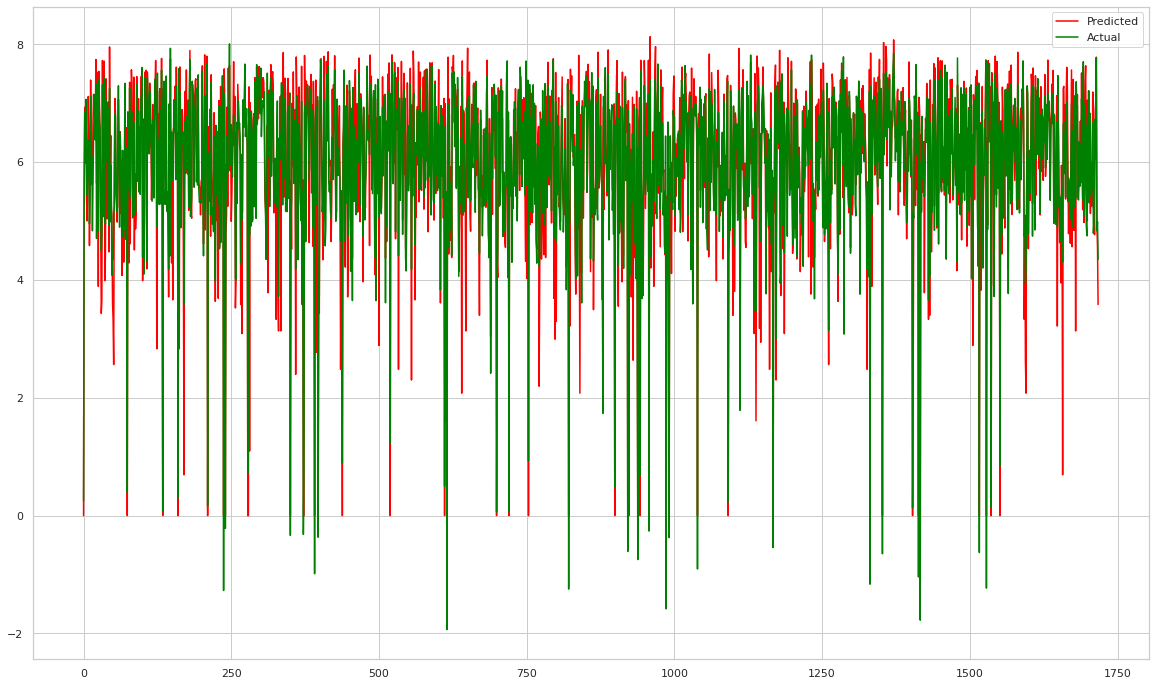

In [174]:
actual_pred(lin_model)

# **Lasso Regression**

In [135]:
# Implementing lasso regression with hyperparameter tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg = lasso_reg.fit(X_train,y_train)

In [136]:
# Getting best parameters after hyperparameter tuning
lasso_reg.best_params_

{'alpha': 0.0001}

In [137]:
# Getting best score after hyperparameter tuning
lasso_reg.best_score_

-0.42860186841435066

In [138]:
# Metrics for lasso regression
metrics(lasso_reg)

The evaluation metrics for training dataset.....
Score : -0.4122346314524146
R2_Score : 0.8415856638952735
Mean Square Error : 0.4122346314524146
Root Mean Square Error : 0.6420550065628448
Adjusted R2 Score : 0.8409139259588738
Mean Absolute Error : 0.4443395080420646
	
	
The evaluation metrics for test dataset.....
Score : -0.40387135756357107
R2_Score : 0.820708050368566
Mean Square Error : 0.40387135756357107
Root Mean Square Error : 0.6355087391716743
Adjusted R2 Score : 0.8176277976794004
Mean Absolute Error : 0.43944272384932287
	


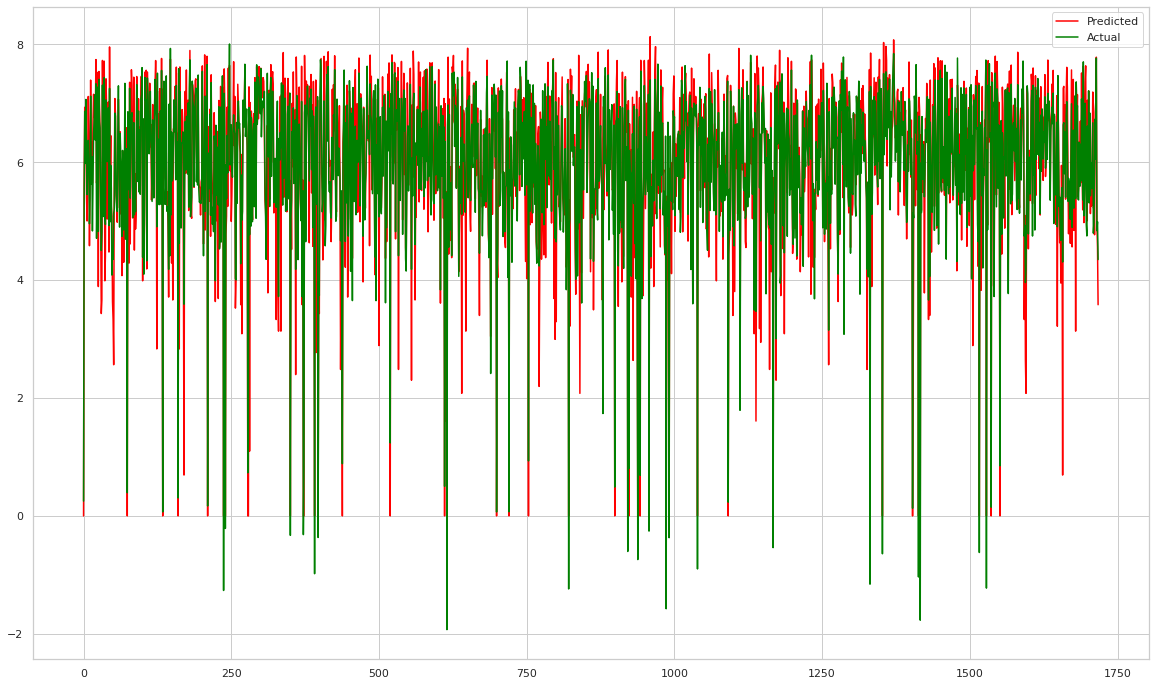

In [139]:
# Plotting actual and predicted values
actual_pred(lasso_reg)

**Ridge Regression**

In [140]:
# Implementing Ridge regression with hyperparameter tuning
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg = ridge_reg.fit(X_train,y_train)
ridge_reg

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [141]:
# Getting best parameters after hyperparameter tuning
ridge_reg.best_params_

{'alpha': 1}

In [142]:
# Getting best score after hyperparameter tuning
ridge_reg.best_score_


-0.42858951435145903

In [143]:
# Metrics for Ridge regression model
metrics(ridge_reg)

The evaluation metrics for training dataset.....
Score : -0.41223891777567373
R2_Score : 0.8415840167385291
Mean Square Error : 0.41223891777567373
Root Mean Square Error : 0.6420583445261604
Adjusted R2 Score : 0.840912271817549
Mean Absolute Error : 0.44451038186343683
	
	
The evaluation metrics for test dataset.....
Score : -0.4037932603418243
R2_Score : 0.8207427203269216
Mean Square Error : 0.4037932603418243
Root Mean Square Error : 0.6354472915528276
Adjusted R2 Score : 0.8176630632709269
Mean Absolute Error : 0.4395389553356908
	


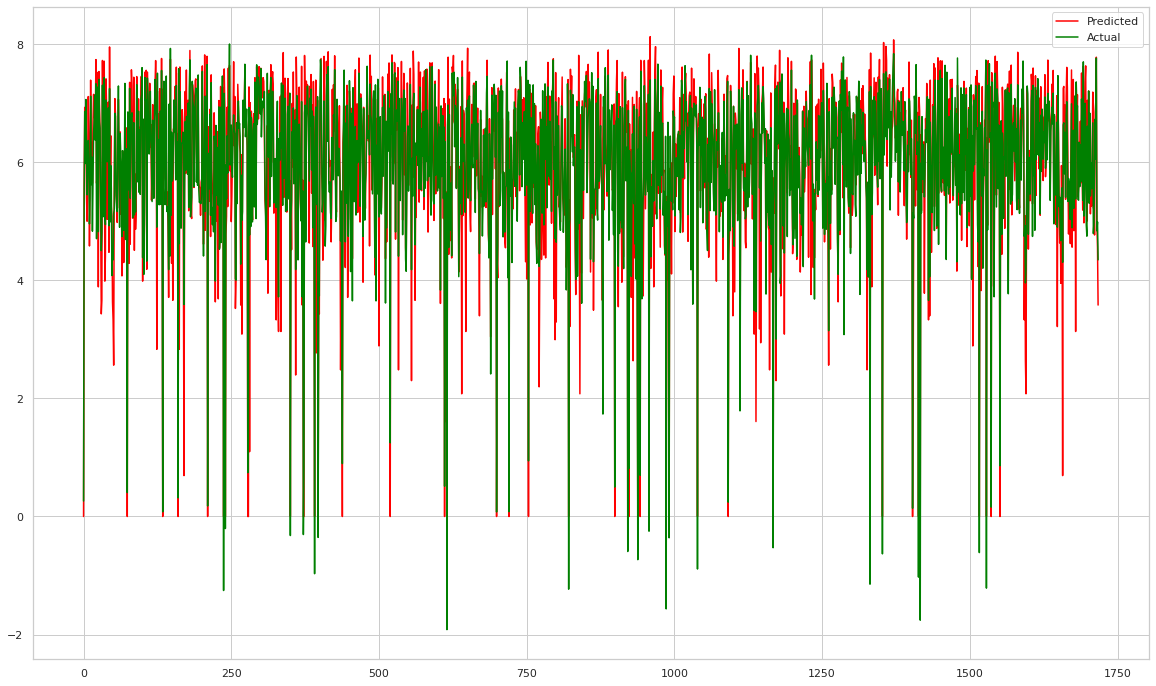

In [144]:
# Plotting actual and predicted values
actual_pred(ridge_reg)

**Decision Tree Regressor**





In [146]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
des_tree_reg = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
des_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [147]:
metrics(des_tree_reg)

The evaluation metrics for training dataset.....
Score : 0.9999988887020026
R2_Score : 0.9999988887020026
Mean Square Error : 2.891881705120926e-06
Root Mean Square Error : 0.0017005533526240587
Adjusted R2 Score : 0.9999988839896701
Mean Absolute Error : 4.148025204476369e-05
	
	
The evaluation metrics for test dataset.....
Score : 0.8369240393711186
R2_Score : 0.8369240393711186
Mean Square Error : 0.3673433734228452
Root Mean Square Error : 0.6060885854583018
Adjusted R2 Score : 0.8341223789100773
Mean Absolute Error : 0.37645442850470306
	


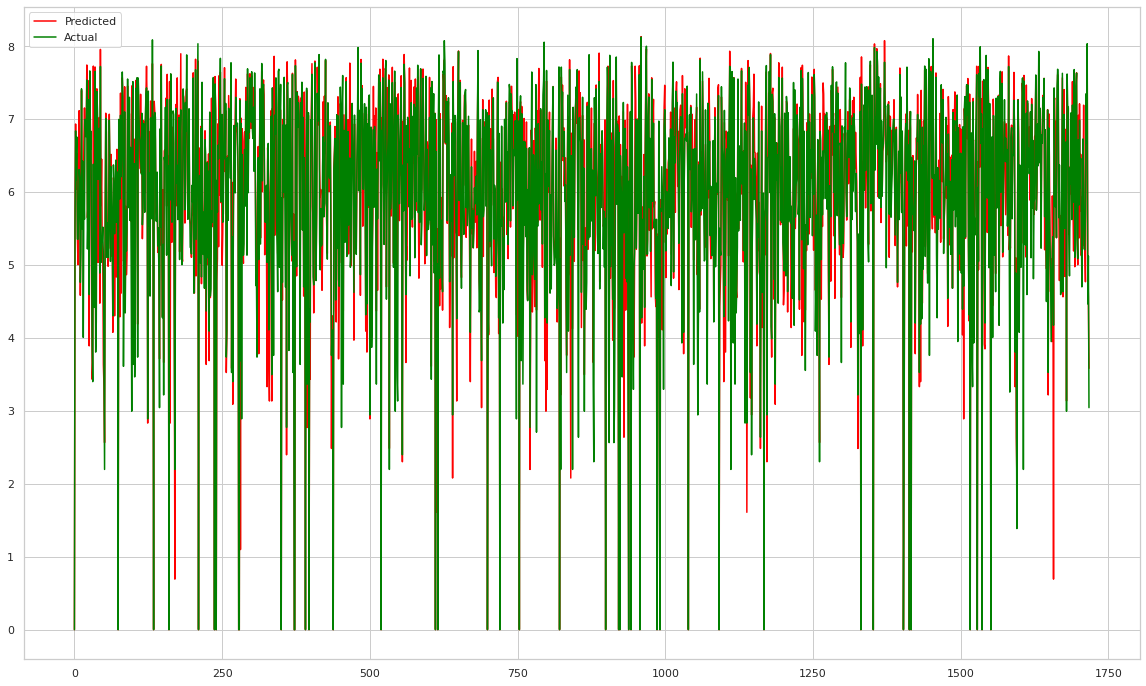

In [148]:
actual_pred(des_tree_reg)

**Random Forest Regression**

In [149]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [150]:
metrics(rf_reg)

The evaluation metrics for training dataset.....
Score : 0.9891554965443587
R2_Score : 0.9891554965443587
Mean Square Error : 0.028220172461950185
Root Mean Square Error : 0.16798860813147476
Adjusted R2 Score : 0.989109511663497
Mean Absolute Error : 0.10619735926289944
	
	
The evaluation metrics for test dataset.....
Score : 0.9040854781455431
R2_Score : 0.9040854781455431
Mean Square Error : 0.2160561488178987
Root Mean Square Error : 0.4648184041299341
Adjusted R2 Score : 0.9024376575686597
Mean Absolute Error : 0.29756408147820657
	


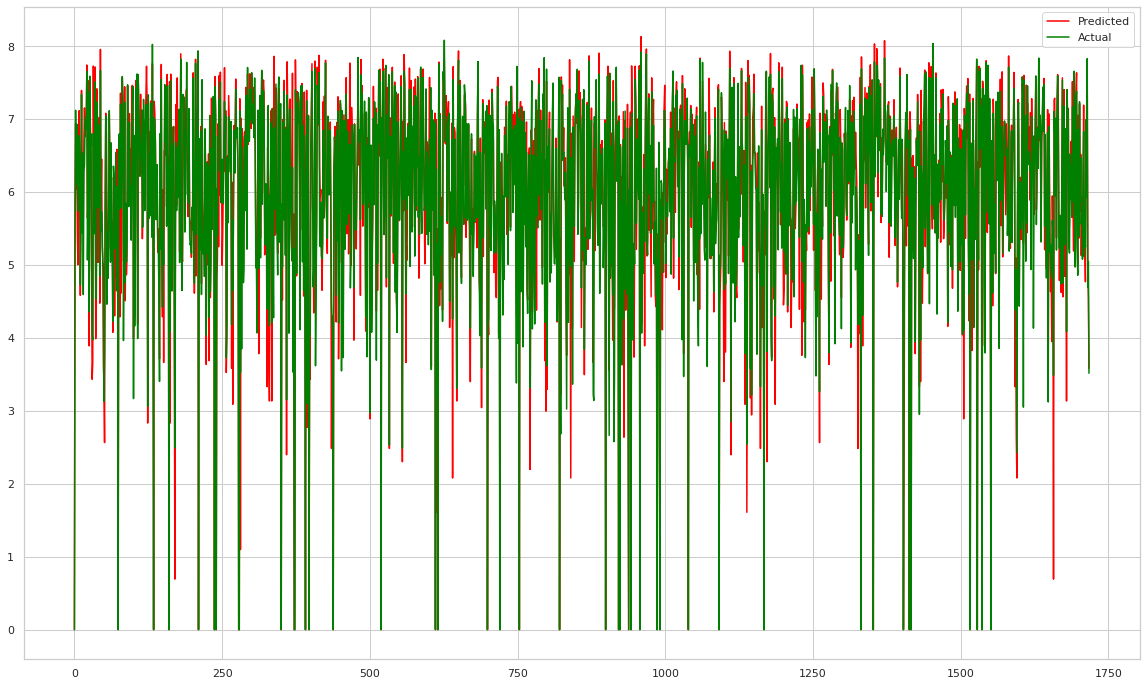

In [151]:
actual_pred(rf_reg)

**GradientBoosting regression**

In [152]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [153]:
metrics(gb_reg)

The evaluation metrics for training dataset.....
Score : 0.9177258616835353
R2_Score : 0.9177258616835353
Mean Square Error : 0.21409835701063712
Root Mean Square Error : 0.46270763664611925
Adjusted R2 Score : 0.9173769875774997
Mean Absolute Error : 0.32781369769738217
	
	
The evaluation metrics for test dataset.....
Score : 0.8925783805828111
R2_Score : 0.8925783805828111
Mean Square Error : 0.24197692843924
Root Mean Square Error : 0.4919115046827427
Adjusted R2 Score : 0.8907328669790798
Mean Absolute Error : 0.3453111662047553
	


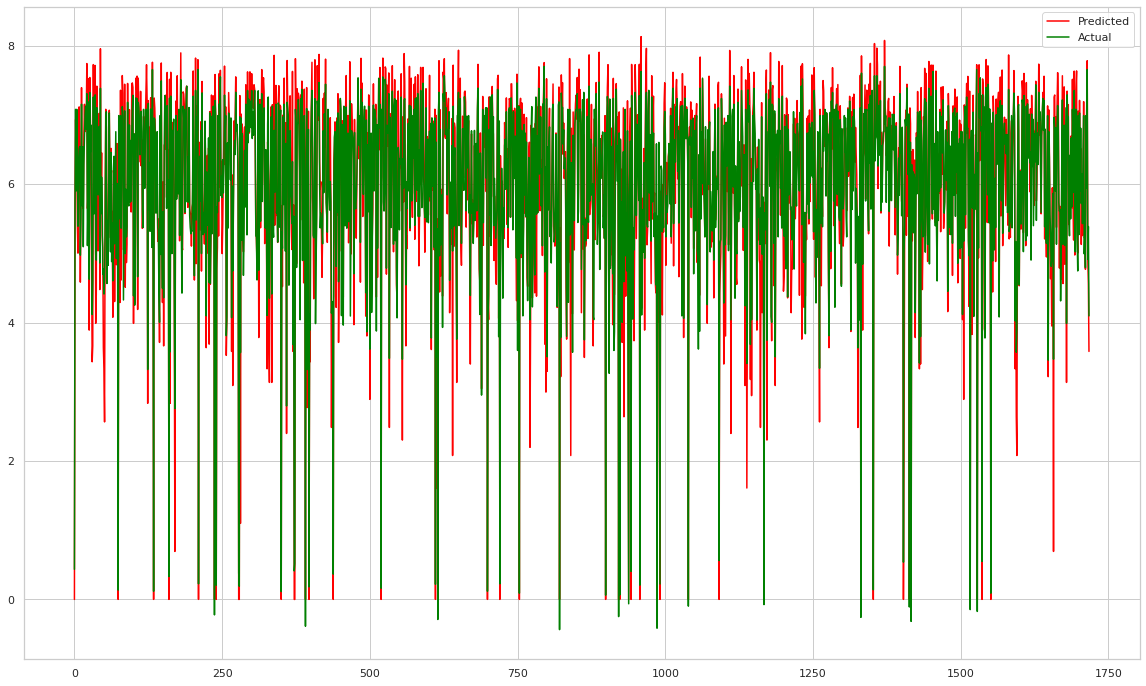

In [155]:
actual_pred(gb_reg)

**XGBoost Regressor**

In [156]:
import xgboost
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

[06:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [157]:
metrics(xgb_reg)

The evaluation metrics for training dataset.....
Score : 0.9172811112678798
R2_Score : 0.9172811112678798
Mean Square Error : 0.2152557113776361
Root Mean Square Error : 0.4639565835050044
Adjusted R2 Score : 0.9169303512483986
Mean Absolute Error : 0.3285385317672451
	
	
The evaluation metrics for test dataset.....
Score : 0.8926463869806714
R2_Score : 0.8926463869806714
Mean Square Error : 0.24182373786775418
Root Mean Square Error : 0.4917557705485053
Adjusted R2 Score : 0.8908020417333015
Mean Absolute Error : 0.34568219056766125
	


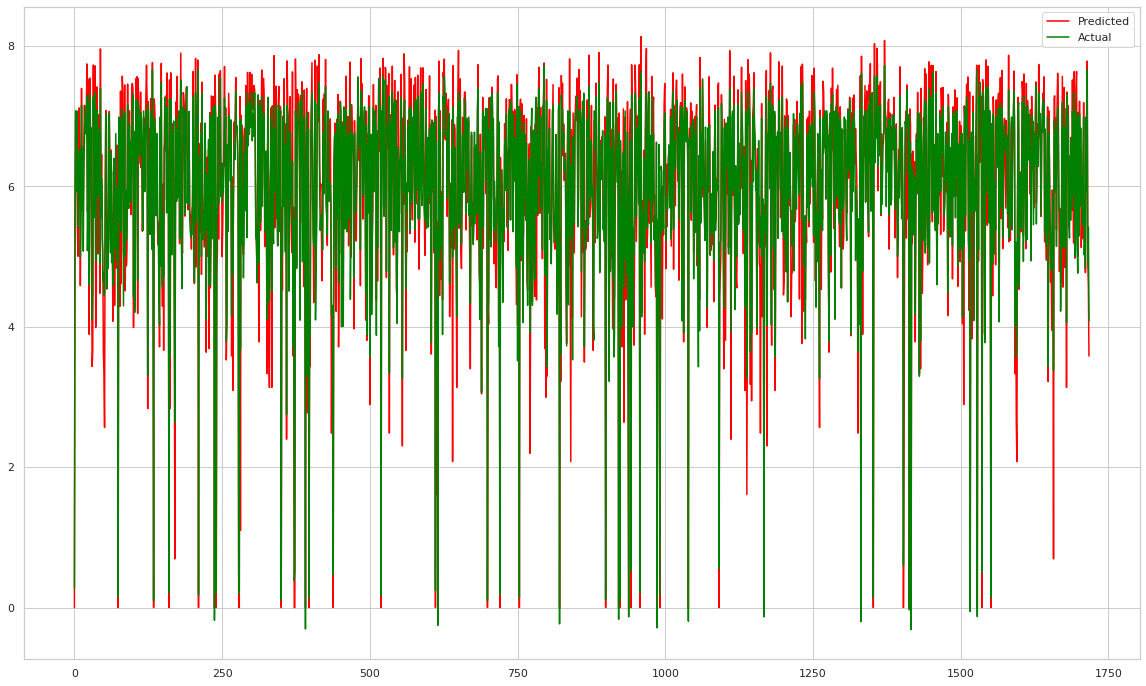

In [158]:
actual_pred(xgb_reg)

In [161]:
from sklearn.model_selection import cross_val_score
def cv_score(model):
  cvs = cross_val_score(model, X_train, y_train, cv = 5).mean()
  return cvs

In [162]:
cv_score(lin_model)

0.8372236615968719

In [163]:
cv_score(lasso_reg)

-0.42031912344784306

In [164]:
cv_score(ridge_reg)

-0.4203189195143907

In [165]:
cv_score(des_tree_reg)

0.8507497414123598

In [166]:
cv_score(rf_reg)

0.9202206070713354

In [167]:
cv_score(gb_reg)

0.9050943492528083

In [169]:
cv_score(xgb_reg)

[06:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.90501292277303